# Finding the LMC orbit ICs

In [31]:
%pylab inline
from scipy.interpolate import interp1d
font = {'size':15, 'family':'serif'}
matplotlib.rc('font', **font)

Populating the interactive namespace from numpy and matplotlib


### Time of initial condition at which the N-body simulations starts. 

In [95]:
real_x = -1.0
real_y = -41.0
real_z = -28.0
real_vx = -57.0
real_vy = -226.0
real_vz = 221.0
real_r = np.sqrt((real_x)**2 + (real_y)**2 + (real_z)**2)
real_v  = np.sqrt((real_vx)**2 + (real_vy)**2 + (real_vz)**2)
print real_r, real_v

49.6588360717 321.194645036


## Function to read data

In [3]:
def reading(filename):
    A1_host = loadtxt('../../../orbits/data/lmc/mw1lmc4/' + filename + '_host.txt')
    A1_sat = loadtxt('../../../orbits/data/lmc/mw1lmc4/' + filename + '_sat.txt')
    # Making Nbody and Analytic times equal
    t = A1_host[:,0] 
    # Defining galactocentric distances and velocities
    x = A1_sat[:,1] - A1_host[:,1] 
    y = A1_sat[:,2] - A1_host[:,2] 
    z = A1_sat[:,3] - A1_host[:,3] 

    vx = A1_sat[:,4] - A1_host[:,4] 
    vy = A1_sat[:,5] - A1_host[:,5] 
    vz = A1_sat[:,6] - A1_host[:,6] 
    R = np.sqrt(x**2 + y**2 + z**2)
    V = np.sqrt(vx**2 + vy**2 + vz**2)
    return t, x, y, z, vx, vy, vz, R, V

def reading_NB(filename):
    Nbody1 = loadtxt(filename)
    NB_t1 = Nbody1[:,0] 
    NB_R1 = Nbody1[:,1]
    NB_V1 = Nbody1[:,8]
    XNB = Nbody1[:,2] - Nbody1[:,5]
    YNB = Nbody1[:,3] - Nbody1[:,6]
    ZNB = Nbody1[:,4] - Nbody1[:,7]
    VXNB = Nbody1[:,9] - Nbody1[:,12]
    VYNB = Nbody1[:,10] - Nbody1[:,13]
    VZNB = Nbody1[:,11] - Nbody1[:,14]
    return NB_t1, XNB, YNB, ZNB, VXNB, VYNB, VZNB, NB_R1, NB_V1

Integrate the orbit using the Analytic code from the acutal position
of the LMC to 2Gyr ago. Without modifying the Coulomb Logarithm.

In [4]:
t1, x1, y1, z1, vx1, vy1, vz1, R1, V1 = reading('mw1lmc4-1')
#tNB14, xNB14, yNB14, zNB14, vxNB14, vyNB14, vzNB14, RNB14, VNB14  = reading_NB('LMCMW-H6.txt')

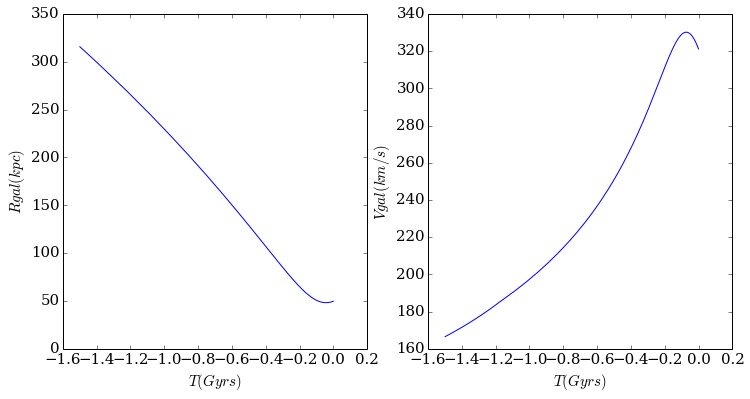

In [5]:
figure(figsize=(12, 6))
subplot(1, 2, 1)
plot(t1, R1)
plt.xlabel('$T(Gyrs)$')
plt.ylabel('$Rgal(kpc)$')

subplot(1, 2, 2)
plot(t1, V1)
plt.xlabel('$T(Gyrs)$')
plt.ylabel('$Vgal(km/s)$')

## ICs for the Nbody Sim

In [6]:
def ICs1(t, R, x, y, z, vx, vy, vz):
    RIC = where(R >= 280)[0]
    IC1 = RIC[0]
    xIC = x[IC1] 
    yIC = y[IC1] 
    zIC = z[IC1] 
    vxIC = vx[IC1] 
    vyIC = vy[IC1] 
    vzIC = vz[IC1] 
    tIC = t[IC1]
    return xIC, yIC, zIC, vxIC, vyIC, vzIC, tIC

## Reading the CM of the MW and the LMC!

In [7]:
xic, yic, zic, vxic, vyic, vzic, tic = ICs1(t1, R1, x1, y1, z1, vx1, vy1, vz1)
print "x:", xic
print "y:", yic
print "z:", zic
print "vx:", vxic
print "vy:", vyic
print "vz:", vzic
print "time of IC:", tic

x: 43.490378
y: 261.472044
z: -90.572333
vx: -20.21568
vy: -177.004835
vz: -5.972404
time of IC: -1.283


In [8]:
t1NB, x1NB, y1NB, z1NB, vx1NB, vy1NB, vz1NB, R1NB, V1NB = reading_NB('LMCMWa1.txt')
print x1NB[0], y1NB[0], z1NB[0], vx1NB[0], vy1NB[0], vz1NB[0]

41.774541 256.790722 -87.335607 -21.715361 -179.137027 -5.200094


## Function that returns the corrected ICs for the N-body simulations

In [16]:
def ICs(t, R, x, y, z, vx, vy, vz, xNB, yNB, zNB, vxNB, vyNB, vzNB):
    RIC = where(R >= 280)[0]
    IC1 = RIC[0]
    xIC = x[IC1] + (x[IC1] - xNB[0])
    yIC = y[IC1] + (y[IC1] - yNB[0])
    zIC = z[IC1] + (z[IC1] - zNB[0])
    vxIC = vx[IC1] + (vx[IC1] - vxNB[0])
    vyIC = vy[IC1] + (vy[IC1] - vyNB[0])
    vzIC = vz[IC1] + (vz[IC1] - vzNB[0])
    tIC = t[IC1]
    return xIC, yIC, zIC, vxIC, vyIC, vzIC, tIC

In [17]:
print 'Initial corrected values for the Nbody'
x2, y2, z2, vx2, vy2, vz2, t2 = ICs(t1, R1, x1, y1, z1, vx1, vy1, vz1, x1NB, y1NB, z1NB, vx1NB, vy1NB, vz1NB)
print "x:", xicn
print "y:", yicn
print "z:", zicn
print "vx:", vxicn
print "vy:", vyicn
print "vz:", vzicn
print "time of IC:", ticn

Initial corrected values for the Nbody
x: 45.206215
y: 266.153366
z: -93.809059
vx: -18.715999
vy: -174.872643
vz: -6.744714
time of IC: -1.283


In [11]:
t2NB, x2NB, y2NB, z2NB, vx2NB, vy2NB, vz2NB, R2NB, V2NB = reading_NB('LMCMWa1N.txt')


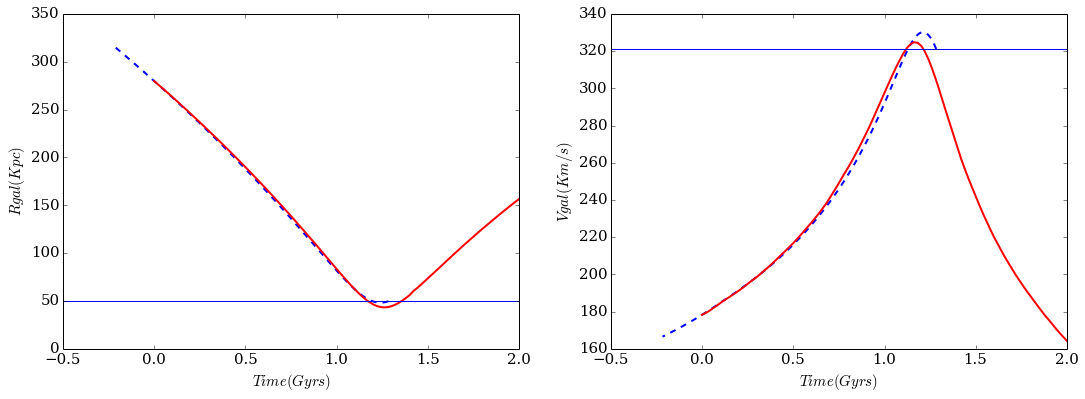

In [106]:
figure(figsize=(18, 6))
subplot(1, 2, 1)
plot(t1 - tic, R1, ls='--', lw=2)
plot(t2NB, R2NB, lw=2, c='r')
plt.axhline(real_r)
plt.xlabel('$Time(Gyrs)$')
plt.ylabel('$Rgal(Kpc)$')

subplot(1, 2, 2)
plot(t1 - tic, V1, ls='--', lw=2)
plot(t2NB, V2NB, lw=2, c='r')
plt.axhline(real_v)
plt.xlabel('$Time(Gyrs)$')
plt.ylabel('$Vgal(Km/s)$')
savefig('finding_ICs.png', bbox_inches='tight')

## Method 1: Closest point to each component of position and velocity

In [128]:
def IC_fromNB1(x, y, z, vx, vy, vz, t, xr, yr, zr, vxr, vyr, vzr):
    Rclosest = np.sqrt((x-xr)**2 + (y-yr)**2 + (z-zr)**2)
    Vclosest = np.sqrt((vx-vxr)**2 + (vy-vyr)**2 + (vz-vzr)**2)
    indexR = where(Rclosest == min(Rclosest))
    indexV = where(Vclosest == min(Vclosest))
    return x[indexR], y[indexR], z[indexR], vx[indexR], vy[indexR], vz[indexR], t[indexR],\
           x[indexV], y[indexV], z[indexV], vx[indexV], vy[indexV], vz[indexV], t[indexV]

In [129]:
xicNBr, yicNBr, zicNBr, vxicNBr, vyicNBr, vzicNBr, ticr, xicNBv, yicNBv, zicNBv, vxicNBv, vyicNBv, vzicNBv, ticv = \
    IC_fromNB1(x2NB, y2NB, z2NB, vx2NB, vy2NB, vz2NB, t2NB, real_x, real_y, real_z, real_vx, real_vy, real_vz)
#ti2 = 1.3
print "Closest distances to the real LMC position"
print xicNBr, yicNBr, zicNBr, vxicNBr, vyicNBr, vzicNBr, ticr
print "Closest velocities to the real LMC velocity"
print xicNBv, yicNBv, zicNBv, vxicNBv, vyicNBv, vzicNBv, ticv

Closest distances to the real LMC position
[ 2.061264] [-37.660538] [-23.676974] [-43.047245] [-208.802717] [ 209.731894] [ 1.3]
Closest velocities to the real LMC velocity
[ 2.931013] [-33.378385] [-27.849751] [-43.926203] [-219.462623] [ 207.349128] [ 1.28]


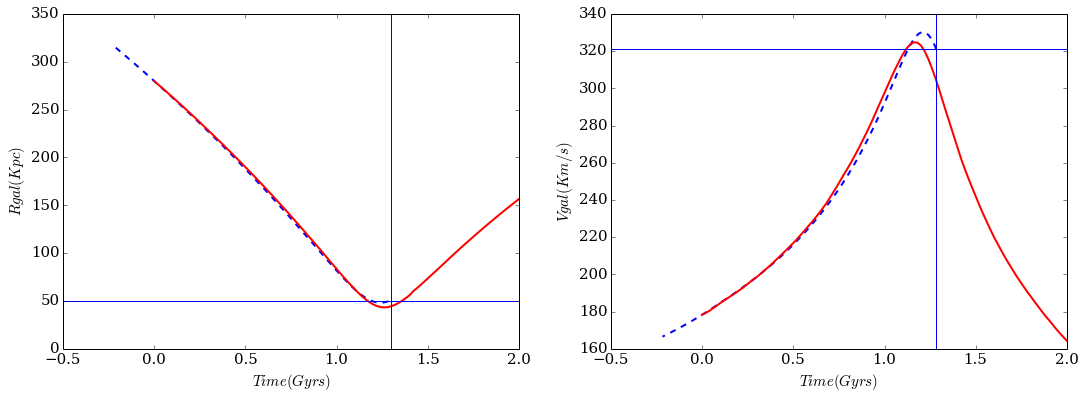

In [111]:
figure(figsize=(18, 6))
subplot(1, 2, 1)
plot(t1 - tic, R1, ls='--', lw=2)
plot(t2NB, R2NB, lw=2, c='r')
plt.axhline(real_r)
plt.axvline(ticr)
plt.xlabel('$Time(Gyrs)$')
plt.ylabel('$Rgal(Kpc)$')

subplot(1, 2, 2)
plot(t1 - tic, V1, ls='--', lw=2)
plot(t2NB, V2NB, lw=2, c='r')
plt.axhline(real_v)
plt.axvline(ticv)
plt.xlabel('$Time(Gyrs)$')
plt.ylabel('$Vgal(Km/s)$')
savefig('finding_ICs.png', bbox_inches='tight')

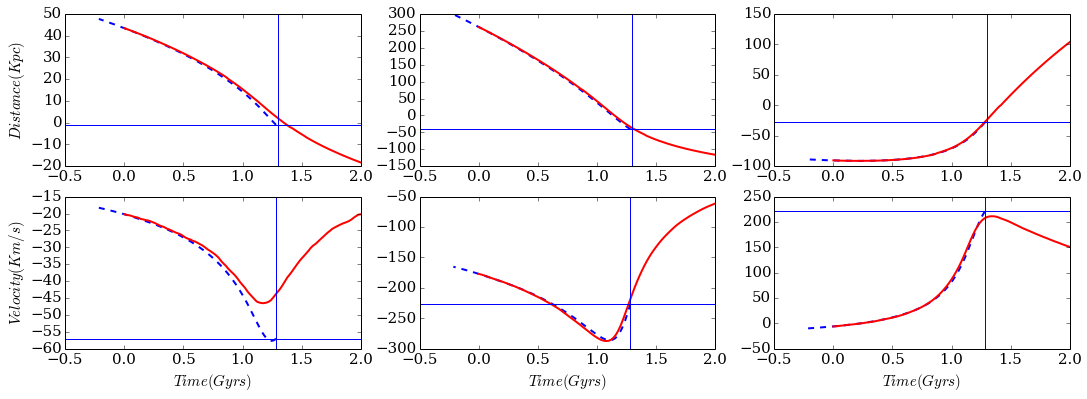

In [114]:
figure(figsize=(18, 6))
subplot(2, 3, 1)
plot(t1 - tic, x1, ls='--', lw=2)
plot(t2NB, x2NB, lw=2, c='r')
plt.axhline(real_x)
plt.ylabel('$Distance(Kpc)$')
plt.axvline(ticr)

subplot(2, 3, 2)
plot(t1 - tic, y1, ls='--', lw=2)
plot(t2NB, y2NB, lw=2, c='r')
plt.axhline(real_y)
plt.axvline(ticr)

subplot(2, 3, 3)
plot(t1 - tic, z1, ls='--', lw=2)
plot(t2NB, z2NB, lw=2, c='r')
plt.axhline(real_z)
plt.axvline(ticr)


subplot(2, 3, 4)
plot(t1 - tic, vx1, ls='--', lw=2)
plot(t2NB, vx2NB, lw=2, c='r')
plt.axhline(real_vx)
plt.axvline(ticv)
plt.xlabel('$Time(Gyrs)$')
plt.ylabel('$Velocity(Km/s)$')

subplot(2, 3, 5)
plot(t1 - tic, vy1, ls='--', lw=2)
plot(t2NB, vy2NB, lw=2, c='r')
plt.axhline(real_vy)
plt.axvline(ticv)
plt.xlabel('$Time(Gyrs)$')

subplot(2, 3, 6)
plot(t1 - tic, vz1, ls='--', lw=2)
plot(t2NB, vz2NB, lw=2, c='r')
plt.axhline(real_vz)
plt.axvline(ticv)
plt.xlabel('$Time(Gyrs)$')


In [90]:
def fit(x_m, y_m, x_a, y_a):
    index = where((x_a>=0) & (x_a<x_a[2]))
    index2 = where((x_m>=0) & (x_m<=x_a[0]))
    x_m = x_m[index2]
    y_m = y_m[index2]
    x_a = x_a[index]
    y_a = y_a[index]
    f = interp1d(x_m, y_m, kind="linear")
    y_ai = y_a
    x_ai = f(y_a)
    return x_ai, y_ai

In [115]:
#x_test, y_test = fit(t2NB, V2NB, t1-tic, V2)

In [117]:
t2, x2, y2, z2, vx2, vy2, vz2, R2, V2 = reading('lmc4mw1a08f1')
t3, x3, y3, z3, vx3, vy3, vz3, R3, V3 = reading('lmc4mw1a1f1')
t4, x4, y4, z4, vx4, vy4, vz4, R4, V4 = reading('lmc4mw1a12f1')
t5, x5, y5, z5, vx5, vy5, vz5, R5, V5 = reading('lmc4mw1a14f1')
t6, x6, y6, z6, vx6, vy6, vz6, R6, V6 = reading('lmc4mw1a16f1')
t7, x7, y7, z7, vx7, vy7, vz7, R7, V7 = reading('lmc4mw1a08f2')
t8, x8, y8, z8, vx8, vy8, vz8, R8, V8 = reading('lmc4mw1a1f2')
t9, x9, y9, z9, vx9, vy9, vz9, R9, V9 = reading('lmc4mw1a12f2')
t10, x10, y10, z10, vx10, vy10, vz10, R10, V10 = reading('lmc4mw1a14f2')
t11, x11, y11, z11, vx11, vy11, vz11, R11, V11 = reading('lmc4mw1a16f2')


In [120]:
t2 = t2 + ti2
t3 = t3 + ti2
t4 = t4 + ti2
t5 = t5 + ti2
t6 = t6 + ti2
t7 = t7 + ti3
t8 = t8 + ti3
t9 = t9 + ti3
t10 = t10 + ti3
t11 = t11 + ti3

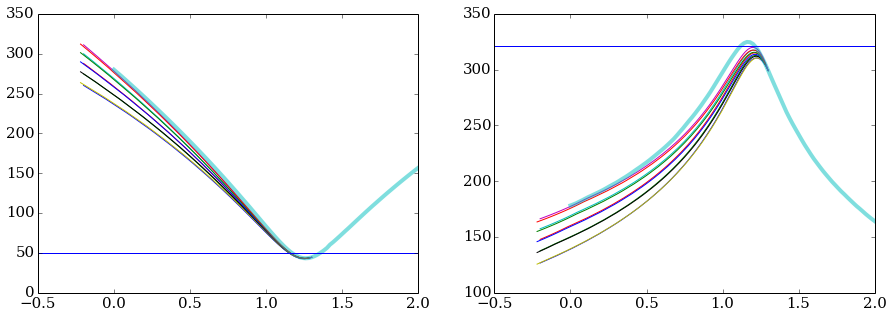

In [121]:
figure(figsize=(15, 5))
subplot(1, 2, 1)
plot(t2, R2)
plot(t3, R3)
plot(t4, R4)
plot(t5, R5)
plot(t6, R6)
plot(t7, R7)
plot(t8, R8)
plot(t9, R9)
plot(t10, R10)
plot(t11, R11)
plot(t2NB, R2NB, lw = 4, alpha=0.5)
plt.axhline(real_r)

subplot(1, 2, 2)
plot(t2, V2)
plot(t3, V3)
plot(t4, V4)
plot(t5, V5)
plot(t6, V6)
plot(t7, V7)
plot(t8, V8)
plot(t9, V9)
plot(t10, V10)
plot(t11, V11)
plot(t2NB, V2NB, lw = 4, alpha=0.5)
plt.axhline(real_v)

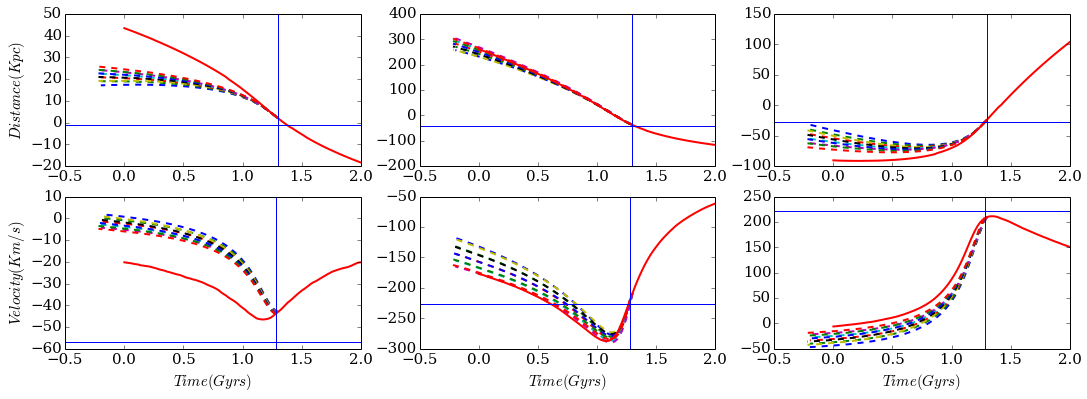

In [125]:
figure(figsize=(18, 6))
subplot(2, 3, 1)
plot(t2, x2, ls='--', lw=2)
plot(t3, x3, ls='--', lw=2)
plot(t4, x4, ls='--', lw=2)
plot(t5, x5, ls='--', lw=2)
plot(t6, x6, ls='--', lw=2)
plot(t7, x7, ls='--', lw=2)
plot(t8, x8, ls='--', lw=2)
plot(t9, x9, ls='--', lw=2)
plot(t10, x10, ls='--', lw=2)
plot(t11, x11, ls='--', lw=2)
plot(t2NB, x2NB, lw=2, c='r')
plt.axhline(real_x)
plt.ylabel('$Distance(Kpc)$')
plt.axvline(ticr)

subplot(2, 3, 2)
plot(t2, y2, ls='--', lw=2)
plot(t3, y3, ls='--', lw=2)
plot(t4, y4, ls='--', lw=2)
plot(t5, y5, ls='--', lw=2)
plot(t6, y6, ls='--', lw=2)
plot(t7, y7, ls='--', lw=2)
plot(t8, y8, ls='--', lw=2)
plot(t9, y9, ls='--', lw=2)
plot(t10, y10, ls='--', lw=2)
plot(t11, y11, ls='--', lw=2)
plot(t2NB, y2NB, lw=2, c='r')
plt.axhline(real_y)
plt.axvline(ticr)

subplot(2, 3, 3)
plot(t2, z2, ls='--', lw=2)
plot(t3, z3, ls='--', lw=2)
plot(t4, z4, ls='--', lw=2)
plot(t5, z5, ls='--', lw=2)
plot(t6, z6, ls='--', lw=2)
plot(t7, z7, ls='--', lw=2)
plot(t8, z8, ls='--', lw=2)
plot(t9, z9, ls='--', lw=2)
plot(t10, z10, ls='--', lw=2)
plot(t11, z11, ls='--', lw=2)
plot(t2NB, z2NB, lw=2, c='r')
plt.axhline(real_z)
plt.axvline(ticr)


subplot(2, 3, 4)
plot(t2, vx2, ls='--', lw=2)
plot(t3, vx3, ls='--', lw=2)
plot(t4, vx4, ls='--', lw=2)
plot(t5, vx5, ls='--', lw=2)
plot(t6, vx6, ls='--', lw=2)
plot(t7, vx7, ls='--', lw=2)
plot(t8, vx8, ls='--', lw=2)
plot(t9, vx9, ls='--', lw=2)
plot(t10, vx10, ls='--', lw=2)
plot(t11, vx11, ls='--', lw=2)
plot(t2NB, vx2NB, lw=2, c='r')
plt.axhline(real_vx)
plt.axvline(ticv)
plt.xlabel('$Time(Gyrs)$')
plt.ylabel('$Velocity(Km/s)$')

subplot(2, 3, 5)
plot(t2, vy2, ls='--', lw=2)
plot(t3, vy3, ls='--', lw=2)
plot(t4, vy4, ls='--', lw=2)
plot(t5, vy5, ls='--', lw=2)
plot(t6, vy6, ls='--', lw=2)
plot(t7, vy7, ls='--', lw=2)
plot(t8, vy8, ls='--', lw=2)
plot(t9, vy9, ls='--', lw=2)
plot(t10, vy10, ls='--', lw=2)
plot(t11, vy11, ls='--', lw=2)
plot(t2NB, vy2NB, lw=2, c='r')
plt.axhline(real_vy)
plt.axvline(ticv)
plt.xlabel('$Time(Gyrs)$')

subplot(2, 3, 6)
plot(t2, vz2, ls='--', lw=2)
plot(t3, vz3, ls='--', lw=2)
plot(t4, vz4, ls='--', lw=2)
plot(t5, vz5, ls='--', lw=2)
plot(t6, vz6, ls='--', lw=2)
plot(t7, vz7, ls='--', lw=2)
plot(t8, vz8, ls='--', lw=2)
plot(t9, vz9, ls='--', lw=2)
plot(t10, vz10, ls='--', lw=2)
plot(t11, vz11, ls='--', lw=2)
plot(t2NB, vz2NB, lw=2, c='r')
plt.axhline(real_vz)
plt.axvline(ticv)
plt.xlabel('$Time(Gyrs)$')

## Method 2: Closest point to the the 3d position and 3d velocity

In [136]:
def IC_fromNB2(x, y, z, vx, vy, vz, t, rr, rv):
    Rclosest = abs(np.sqrt(x**2 + y**2 + z**2) - rr)
    Vclosest = abs(np.sqrt(vx**2 + vy**2 + vz**2) - rv)
    indexR = where(Rclosest == min(Rclosest))
    indexV = where(Vclosest == min(Vclosest))
    return x[indexR], y[indexR], z[indexR], vx[indexR], vy[indexR], vz[indexR], t[indexR],\
           x[indexV], y[indexV], z[indexV], vx[indexV], vy[indexV], vz[indexV], t[indexV]

In [137]:
xicNBr2, yicNBr2, zicNBr2, vxicNBr2, vyicNBr2, vzicNBr2, ticr2, xicNBv2, yicNBv2, zicNBv2, vxicNBv2, vyicNBv2, vzicNBv2, ticv2 = \
    IC_fromNB2(x2NB, y2NB, z2NB, vx2NB, vy2NB, vz2NB, t2NB, real_r, real_v)
#ti2 = 1.3
print "Closest distances to the real LMC position"
print xicNBr2, yicNBr2, zicNBr2, vxicNBr2, vyicNBr2, vzicNBr2, ticr2
print "Closest velocities to the real LMC velocity"
print xicNBv2, yicNBv2, zicNBv2, vxicNBv2, vyicNBv2, vzicNBv2, ticv2

Closest distances to the real LMC position
[-0.424641] [-49.265048] [-10.995038] [-39.982141] [-180.005176] [ 211.164761] [ 1.36]
Closest velocities to the real LMC velocity
[ 10.200533] [ 7.872112] [-56.749751] [-46.02181] [-284.971983] [ 141.30782] [ 1.12]


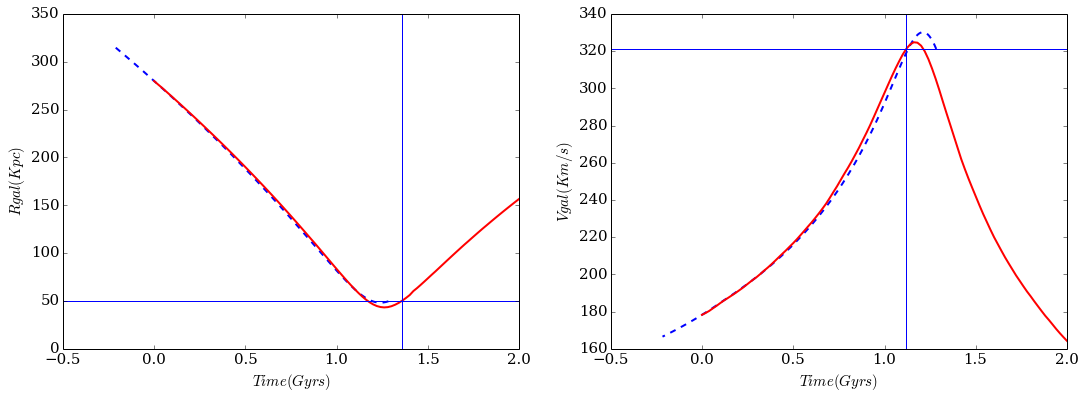

In [138]:
figure(figsize=(18, 6))
subplot(1, 2, 1)
plot(t1 - tic, R1, ls='--', lw=2)
plot(t2NB, R2NB, lw=2, c='r')
plt.axhline(real_r)
plt.axvline(ticr2)
plt.xlabel('$Time(Gyrs)$')
plt.ylabel('$Rgal(Kpc)$')

subplot(1, 2, 2)
plot(t1 - tic, V1, ls='--', lw=2)
plot(t2NB, V2NB, lw=2, c='r')
plt.axhline(real_v)
plt.axvline(ticv2)
plt.xlabel('$Time(Gyrs)$')
plt.ylabel('$Vgal(Km/s)$')
savefig('finding_ICs.png', bbox_inches='tight')